<a href="https://colab.research.google.com/github/sjd1365/learn/blob/main/RFM_by_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

List = pd.read_excel('Sales.xlsx')

List

Saving Sales.xlsx to Sales (1).xlsx


,Customer_ID,First Name,Last Name,Tel,Email,Purchase_Date,Net_Revenue
0,1001,فاطمه,قرائی,9126850954,email01@gmail.com,2020-12-25,11532410
1,1002,زهرا,فرزانه,9124436398,email02@gmail.com,2020-12-25,16706833
2,1004,محمد,یعقوبی,9122767153,email03@gmail.com,2020-12-25,15688960
3,1005,مريم,هاشم نژاد,9124137956,email04@gmail.com,2020-12-25,5319693
4,1006,مهدي,اعتمادی,9124865123,email05@gmail.com,2020-12-27,8423006
...,...,...,...,...,...,...,...
1057,2059,آرام,ابوطالب پور احمدی,9121933729,email1058@gmail.com,2023-11-14,14827881
1058,2060,الهه سادات,پیروزبخت,9124294469,email1059@gmail.com,2023-11-15,19447920
1059,2061,آمنه سادات,رمضانلو,9121149253,email1060@gmail.com,2023-11-17,2144241
1060,2062,اميرحافظ,صالحی,9123151680,email1061@gmail.com,2023-11-18,5872481


In [6]:
#Determining Columns Name
Customer_ID = 'Customer_ID'
Order_Date = 'Purchase_Date'
Revenue = 'Net_Revenue'

In [7]:
#Parameter Setting
Recency_weight=0.2
Frequency_weight=0.5
Monetary_weight=0.3

In [9]:
#Recency
Recency = List.groupby(by='Customer_ID', as_index=False)[Order_Date].max()
Recency.columns = ['Customer_ID', 'Last_Order_Date']
Recency.Last_Order_Date = pd.to_datetime(Recency['Last_Order_Date'])
Last_date = Recency.Last_Order_Date.max()
Recency['Recency'] = Recency['Last_Order_Date'].apply(lambda x: (Last_date - x).days)
Recency

,Customer_ID,Last_Order_Date,Recency
0,1001,2020-12-25,1059
1,1002,2020-12-25,1059
2,1004,2020-12-25,1059
3,1005,2020-12-25,1059
4,1006,2020-12-27,1057
...,...,...,...
983,2059,2023-11-14,5
984,2060,2023-11-15,4
985,2061,2023-11-17,2
986,2062,2023-11-18,1


In [10]:
#Frequency

Frequency = List.drop_duplicates().groupby(by=Customer_ID, as_index=False)[Order_Date].count()
Frequency.columns = ['Customer_ID','Frequency']
Frequency

,Customer_ID,Frequency
0,1001,1
1,1002,1
2,1004,1
3,1005,1
4,1006,1
...,...,...
983,2059,1
984,2060,1
985,2061,1
986,2062,1


In [ ]:
# Monetary

Monetary = List.groupby(by=Customer_ID, as_index=False)[Revenue].sum()
Monetary.columns = ['Customer_ID','Monetary']
Monetary

,Customer_ID,Monetary
0,1001,11532410
1,1002,16706833
2,1004,15688960
3,1005,5319693
4,1006,8423006
...,...,...
983,2059,14827881
984,2060,19447920
985,2061,2144241
986,2062,5872481


In [12]:
# Monetary
Monetary = List.groupby(by=Customer_ID, as_index=False)[Revenue].sum()
Monetary.columns = ['Customer_ID','Monetary']

InitialMerged_List = Recency.merge(Frequency, on='Customer_ID')
result_RFM = InitialMerged_List.merge(Monetary, on='Customer_ID').drop(columns='Last_Order_Date')
result_RFM

,Customer_ID,Recency,Frequency,Monetary
0,1001,1059,1,11532410
1,1002,1059,1,16706833
2,1004,1059,1,15688960
3,1005,1059,1,5319693
4,1006,1057,1,8423006
...,...,...,...,...
983,2059,5,1,14827881
984,2060,4,1,19447920
985,2061,2,1,2144241
986,2062,1,1,5872481


In [13]:
#Ranking

result_RFM['R_rank'] = result_RFM['Recency'].rank(ascending = False)
result_RFM['F_rank'] = result_RFM['Frequency'].rank(ascending = True)
result_RFM['M_rank'] = result_RFM['Monetary'].rank(ascending = True)
result_RFM

,Customer_ID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,1001,1059,1,11532410,2.5,478.0,371.0
1,1002,1059,1,16706833,2.5,478.0,531.0
2,1004,1059,1,15688960,2.5,478.0,502.0
3,1005,1059,1,5319693,2.5,478.0,170.0
4,1006,1057,1,8423006,5.0,478.0,284.0
...,...,...,...,...,...,...,...
983,2059,5,1,14827881,982.5,478.0,467.0
984,2060,4,1,19447920,985.0,478.0,608.0
985,2061,2,1,2144241,986.0,478.0,63.0
986,2062,1,1,5872481,987.0,478.0,193.0


In [14]:
#Scaling

result_RFM['R_rank_norm'] = (result_RFM['R_rank']/result_RFM['R_rank'].max())*100
result_RFM['F_rank_norm'] = (result_RFM['F_rank']/result_RFM['F_rank'].max())*100
result_RFM['M_rank_norm'] = (result_RFM['M_rank']/result_RFM['M_rank'].max())*100

result_RFM.drop(columns=['R_rank','F_rank','M_rank'], inplace=True)
result_RFM

,Customer_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1001,1059,1,11532410,0.253036,48.405063,37.550607
1,1002,1059,1,16706833,0.253036,48.405063,53.744939
2,1004,1059,1,15688960,0.253036,48.405063,50.809717
3,1005,1059,1,5319693,0.253036,48.405063,17.206478
4,1006,1057,1,8423006,0.506073,48.405063,28.744939
...,...,...,...,...,...,...,...
983,2059,5,1,14827881,99.443320,48.405063,47.267206
984,2060,4,1,19447920,99.696356,48.405063,61.538462
985,2061,2,1,2144241,99.797571,48.405063,6.376518
986,2062,1,1,5872481,99.898785,48.405063,19.534413


In [15]:
#Scoring

result_RFM['RFM_Score'] = Recency_weight*result_RFM['R_rank_norm']+Frequency_weight*result_RFM['F_rank_norm']+Monetary_weight*result_RFM['M_rank_norm']
result_RFM['RFM_Score'] *= 0.05
result_RFM = result_RFM.round(2)
result_RFM

,Customer_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,1001,1059,1,11532410,0.25,48.41,37.55,1.78
1,1002,1059,1,16706833,0.25,48.41,53.74,2.02
2,1004,1059,1,15688960,0.25,48.41,50.81,1.97
3,1005,1059,1,5319693,0.25,48.41,17.21,1.47
4,1006,1057,1,8423006,0.51,48.41,28.74,1.65
...,...,...,...,...,...,...,...,...
983,2059,5,1,14827881,99.44,48.41,47.27,2.91
984,2060,4,1,19447920,99.70,48.41,61.54,3.13
985,2061,2,1,2144241,99.80,48.41,6.38,2.30
986,2062,1,1,5872481,99.90,48.41,19.53,2.50


In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [17]:
X = result_RFM[['R_rank_norm','F_rank_norm','M_rank_norm']]

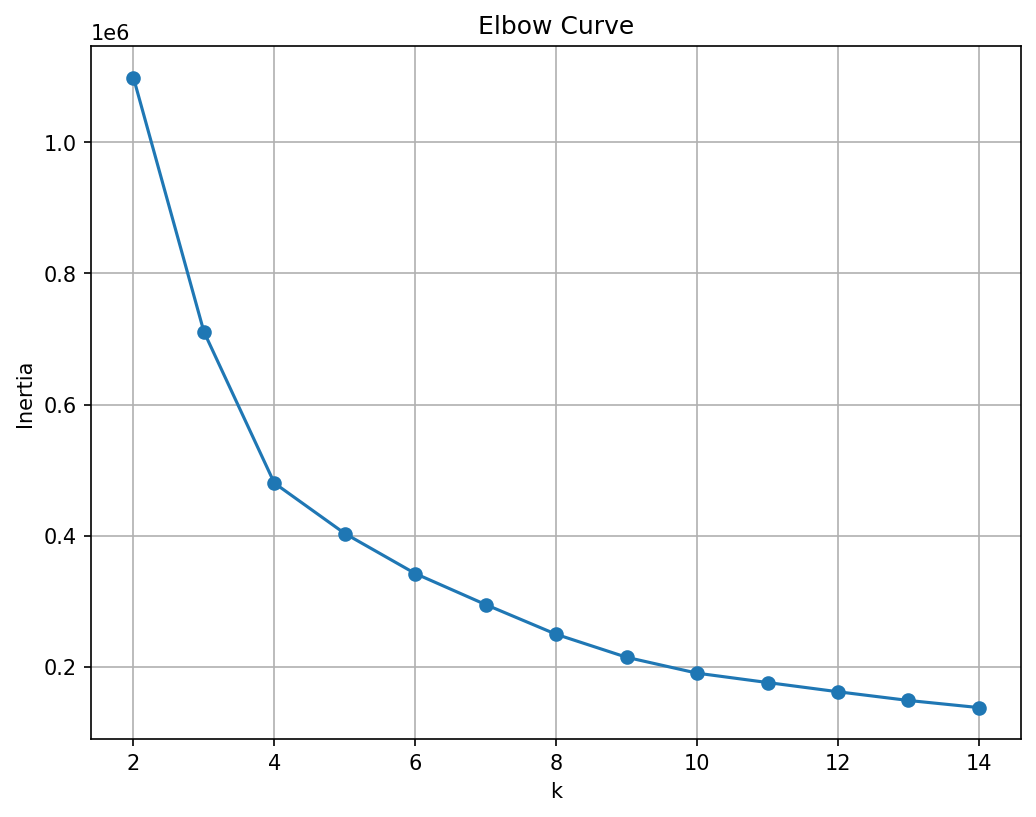

In [21]:
inertia=[]

for i in range (2,15):
    kmn = KMeans(n_clusters=i, init='k-means++', n_init=15 , random_state= 42)
    kmn.fit(X)
    inertia.append(kmn.inertia_)

# Plot
plt.figure(figsize=(8,6), dpi=150)
plt.plot(range(2,15),inertia, marker = 'o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

In [ ]:
# k = 3
best_kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
result_RFM['Cluster'] = best_kmeans.fit_predict(X)
result_RFM['Cluster']

0      1
1      1
2      1
3      1
4      1
      ..
983    2
984    2
985    0
986    0
987    0
Name: Cluster, Length: 988, dtype: int32

In [ ]:
result_RFM.describe()

,Customer_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster
count,988.000000,988.000000,988.000000,9.880000e+02,988.000000,988.000000,988.000000,988.000000,988.000000
mean,1532.262146,423.601215,1.074899,1.608277e+07,50.050982,50.080779,50.050607,2.503087,0.980769
std,309.693552,308.453726,0.503742,1.142492e+07,28.880885,8.994064,28.882143,0.630089,0.786561
min,1001.000000,0.000000,1.000000,3.121100e+04,0.250000,48.410000,0.100000,1.250000,0.000000
25%,1261.750000,135.000000,1.000000,7.140729e+06,25.050000,48.410000,25.075000,2.060000,0.000000
50%,1524.500000,411.500000,1.000000,1.558256e+07,49.975000,48.410000,50.050000,2.460000,1.000000
75%,1804.250000,678.000000,1.000000,2.314137e+07,75.050000,48.410000,75.025000,2.862500,2.000000
max,2063.000000,1059.000000,7.000000,1.151906e+08,100.000000,100.000000,100.000000,4.980000,2.000000


In [ ]:
result_RFM.head()

,Customer_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster
0,1001,1059,1,11532410,0.25,48.41,37.55,1.78,1
1,1002,1059,1,16706833,0.25,48.41,53.74,2.02,1
2,1004,1059,1,15688960,0.25,48.41,50.81,1.97,1
3,1005,1059,1,5319693,0.25,48.41,17.21,1.47,1
4,1006,1057,1,8423006,0.51,48.41,28.74,1.65,1


In [ ]:
Cluster_summary = result_RFM.groupby('Cluster').agg(
    {'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean'}
).reset_index()

In [ ]:
print(Cluster_summary)

   Cluster     Recency  Frequency      Monetary
0        0  250.625397   1.009524  6.974688e+06
1        1  748.368700   1.000000  1.600249e+07
2        2  194.040541   1.239865  2.587772e+07


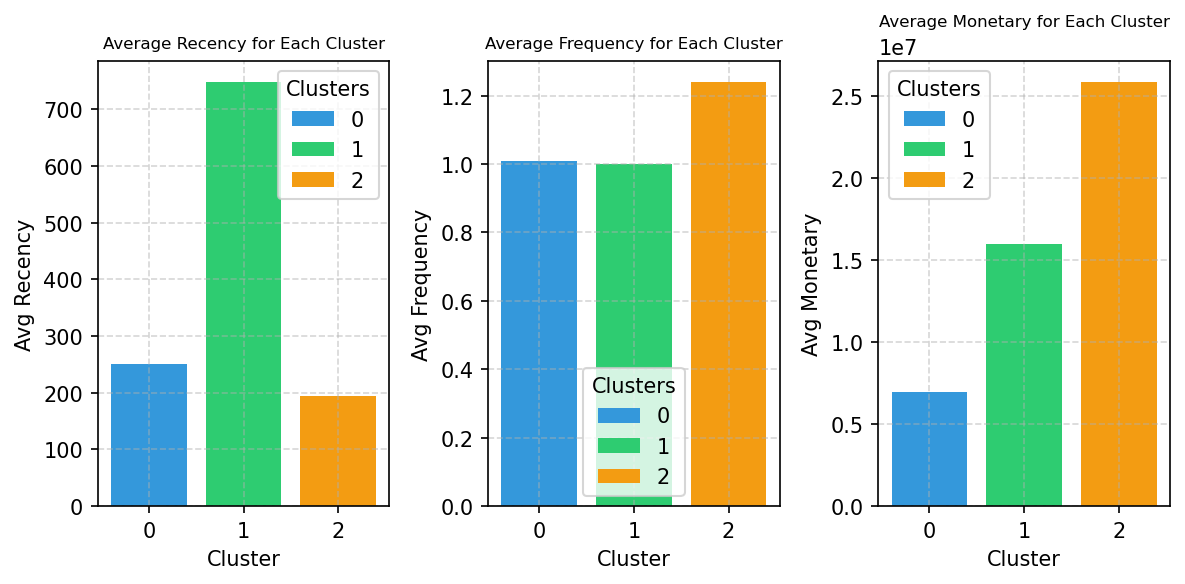

In [ ]:
colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']

plt.figure(figsize=(8,4),dpi=150)

plt.subplot(1,3,1)
bars=plt.bar(Cluster_summary.index,Cluster_summary['Recency'], color= colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster', size=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars,Cluster_summary.index, title='Clusters')


plt.subplot(1,3,2)
bars = plt.bar(Cluster_summary.index,Cluster_summary['Frequency'], color= colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster', size=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars,Cluster_summary.index, title='Clusters')

plt.subplot(1,3,3)
bars = plt.bar(Cluster_summary.index,Cluster_summary['Monetary'], color= colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary for Each Cluster', size=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars,Cluster_summary.index, title='Clusters')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Monetary')

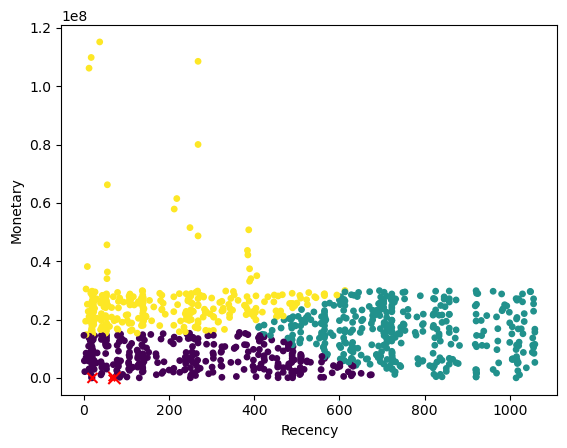

In [ ]:
Labels = best_kmeans.labels_
Centroids = best_kmeans.cluster_centers_

plt.scatter(result_RFM['Recency'], result_RFM['Monetary'], s = 15, c = Labels)
plt.scatter(Centroids[:, 0], Centroids[:, 1], Centroids[:, 2], c = 'r', marker = 'x')
plt.xlabel('Recency')
plt.ylabel('Monetary')

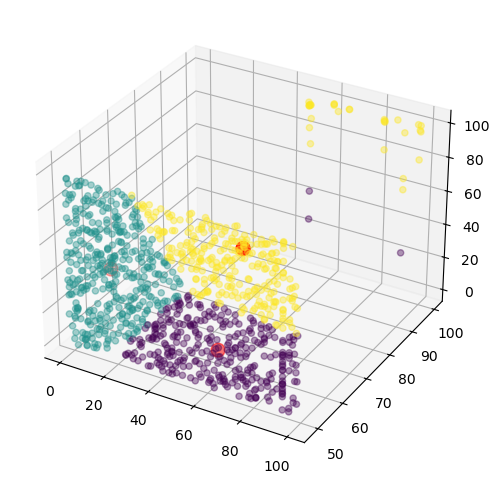

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(result_RFM['R_rank_norm'], result_RFM['F_rank_norm'], result_RFM['M_rank_norm'], c = Labels, marker='o', alpha=0.4)
ax.scatter3D(Centroids[:, 0], Centroids[:, 1], Centroids[:, 2], s = 100, c = 'red', marker = 'o')


In [ ]:
List_RFM = pd.merge(result_RFM,List.drop_duplicates('Customer_ID'), how='left')[['Customer_ID','First Name','Last Name','Tel','Email','Recency','Frequency','Monetary','RFM_Score','Cluster']]
List_RFM

,Customer_ID,First Name,Last Name,Tel,Email,Recency,Frequency,Monetary,RFM_Score,Cluster
0,1001,فاطمه,قرائی,9126850954,email01@gmail.com,1059,1,11532410,1.78,1
1,1002,زهرا,فرزانه,9124436398,email02@gmail.com,1059,1,16706833,2.02,1
2,1004,محمد,یعقوبی,9122767153,email03@gmail.com,1059,1,15688960,1.97,1
3,1005,مريم,هاشم نژاد,9124137956,email04@gmail.com,1059,1,5319693,1.47,1
4,1006,مهدي,اعتمادی,9124865123,email05@gmail.com,1057,1,8423006,1.65,1
...,...,...,...,...,...,...,...,...,...,...
983,2059,آرام,ابوطالب پور احمدی,9121933729,email1058@gmail.com,5,1,14827881,2.91,2
984,2060,الهه سادات,پیروزبخت,9124294469,email1059@gmail.com,4,1,19447920,3.13,2
985,2061,آمنه سادات,رمضانلو,9121149253,email1060@gmail.com,2,1,2144241,2.30,0
986,2062,اميرحافظ,صالحی,9123151680,email1061@gmail.com,1,1,5872481,2.50,0


In [ ]:
result_RFM

,Customer_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster
0,1001,1059,1,11532410,0.25,48.41,37.55,1.78,1
1,1002,1059,1,16706833,0.25,48.41,53.74,2.02,1
2,1004,1059,1,15688960,0.25,48.41,50.81,1.97,1
3,1005,1059,1,5319693,0.25,48.41,17.21,1.47,1
4,1006,1057,1,8423006,0.51,48.41,28.74,1.65,1
...,...,...,...,...,...,...,...,...,...
983,2059,5,1,14827881,99.44,48.41,47.27,2.91,2
984,2060,4,1,19447920,99.70,48.41,61.54,3.13,2
985,2061,2,1,2144241,99.80,48.41,6.38,2.30,0
986,2062,1,1,5872481,99.90,48.41,19.53,2.50,0


In [ ]:
List

,Customer_ID,First Name,Last Name,Tel,Email,Purchase_Date,Net_Revenue
0,1001,فاطمه,قرائی,9126850954,email01@gmail.com,2020-12-25,11532410
1,1002,زهرا,فرزانه,9124436398,email02@gmail.com,2020-12-25,16706833
2,1004,محمد,یعقوبی,9122767153,email03@gmail.com,2020-12-25,15688960
3,1005,مريم,هاشم نژاد,9124137956,email04@gmail.com,2020-12-25,5319693
4,1006,مهدي,اعتمادی,9124865123,email05@gmail.com,2020-12-27,8423006
...,...,...,...,...,...,...,...
1057,2059,آرام,ابوطالب پور احمدی,9121933729,email1058@gmail.com,2023-11-14,14827881
1058,2060,الهه سادات,پیروزبخت,9124294469,email1059@gmail.com,2023-11-15,19447920
1059,2061,آمنه سادات,رمضانلو,9121149253,email1060@gmail.com,2023-11-17,2144241
1060,2062,اميرحافظ,صالحی,9123151680,email1061@gmail.com,2023-11-18,5872481


In [ ]:
List_RFM.to_excel('RFM_Output.xlsx', index=False)